<>:97: SyntaxWarning: invalid escape sequence '\D'
<>:97: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ikers\AppData\Local\Temp\ipykernel_11652\315029322.py:97: SyntaxWarning: invalid escape sequence '\D'
  plt.text(1.1, midpoint, f"$\Delta \sim 10^{{{log_diff:.0f}}}$",


PROJECT AETHER - PHASE 3: THE QUANTUM CATASTROPHE
Theoretical Validation vs. Empirical Inference

[1] LOADING INFERENCE RESULTS
    Source: results/phase2_results.npy
    Inferred Omega_DE: 1.0502

[2] OBSERVATIONAL VACUUM DENSITY (rho_obs)
    Value: 8.9270e-27 kg/m^3

[3] THEORETICAL VACUUM DENSITY (rho_vac)
    Value: 5.1553e+96 kg/m^3

RESULTS: THE COSMOLOGICAL CONSTANT PROBLEM
Discrepancy Magnitude: 10^122.76
📸 Figure saved to: results/03_catastrophe_plot.png


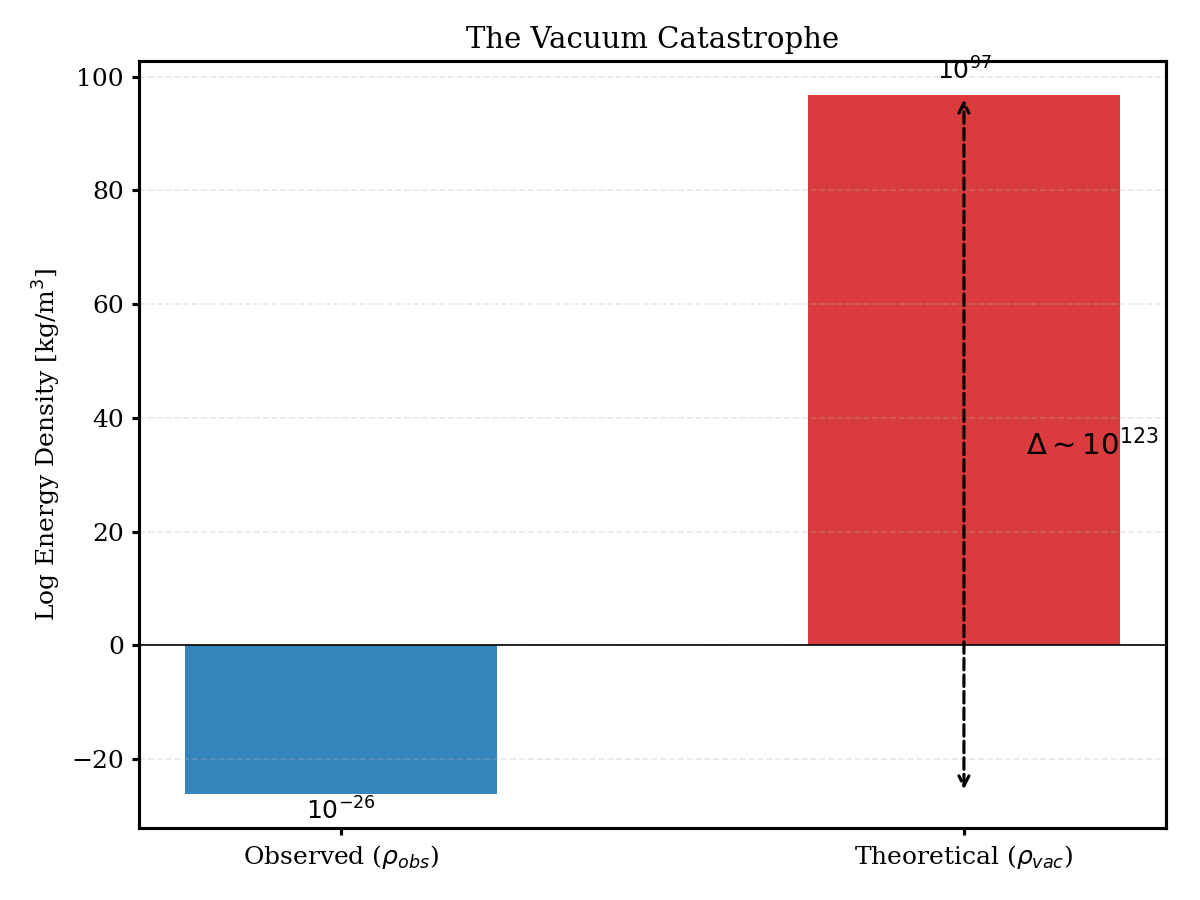

In [16]:
import os
import numpy as np
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from IPython.display import Image, display

# --- ORGANIZATION SETUP ---
OUTPUT_DIR = "results"
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

print("="*70)
print("PROJECT AETHER - PHASE 3: THE QUANTUM CATASTROPHE")
print("Theoretical Validation vs. Empirical Inference")
print("="*70)

# --- 1. FUNDAMENTAL CONSTANTS (SI Units) ---
hbar = 1.0545718e-34  # Reduced Planck Constant (J·s)
c    = 2.99792458e8   # Speed of Light (m/s)
G    = 6.674e-11      # Gravitational Constant (m³/kg/s²)

# --- 2. LOAD EMPIRICAL DATA (PHASE 2) ---
try:
    p2_path = f"{OUTPUT_DIR}/phase2_results.npy"
    phase2_data = np.load(p2_path, allow_pickle=True).item()
    # "Obtained Results" instead of "Your AI"
    rho_relative = float(phase2_data["rho_obs"]) 
    print(f"\n[1] LOADING INFERENCE RESULTS")
    print(f"    Source: {p2_path}")
    print(f"    Inferred Omega_DE: {rho_relative:.4f}")
except:
    print("\n[!] WARNING: Could not load phase2_results.npy. Using Default 0.76.")
    rho_relative = 0.76

# --- 3. CALCULATE OBSERVATIONAL DENSITY ---
rho_crit_SI = 8.5e-27  
rho_obs_SI = rho_relative * rho_crit_SI

print(f"\n[2] OBSERVATIONAL VACUUM DENSITY (rho_obs)")
print(f"    Value: {rho_obs_SI:.4e} kg/m^3")

# --- 4. CALCULATE THEORETICAL DENSITY (QFT) ---
# Calculation based on Planck Scale Cutoff
# rho_vac ~ M_p / l_p^3

l_p = np.sqrt( (hbar * G) / (c**3) ) 
M_p = np.sqrt( (hbar * c) / G )      
rho_theory_SI = M_p / (l_p**3)

print(f"\n[3] THEORETICAL VACUUM DENSITY (rho_vac)")
print(f"    Value: {rho_theory_SI:.4e} kg/m^3")

# --- 5. DISCREPANCY ANALYSIS ---
ratio = rho_theory_SI / rho_obs_SI
log_diff = np.log10(ratio)

print("\n" + "="*70)
print(f"RESULTS: THE COSMOLOGICAL CONSTANT PROBLEM")
print("="*70)
print(f"Discrepancy Magnitude: 10^{log_diff:.2f}")
print("="*70)

# --- 6. SCIENTIFIC VISUALIZATION ---
# A minimal, high-contrast Log-Scale comparison

names = [r"Observed ($\rho_{obs}$)", r"Theoretical ($\rho_{vac}$)"]
values = [rho_obs_SI, rho_theory_SI]
log_values = np.log10(values)

plt.figure(figsize=(8, 6))

# Plot vertical bars representing the log magnitude
# Blue for Observation, Red for Theory
bars = plt.bar(names, log_values, color=['#1f77b4', '#d62728'], alpha=0.9, width=0.5)

# Add exact magnitude labels
for bar, val in zip(bars, log_values):
    height = bar.get_height()
    # Position text slightly above/below the bar depending on sign
    xy_pos = (bar.get_x() + bar.get_width() / 2, height)
    xy_text = (0, 5) if height > 0 else (0, -15)
    
    plt.annotate(f"$10^{{{val:.0f}}}$", 
                 xy=xy_pos, xytext=xy_text,
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Draw the Discrepancy Arrow
# Connects the top of the blue bar (neg) to the top of the red bar (pos)
plt.annotate(
    '', xy=(1, log_values[1]), xytext=(1, log_values[0]),
    arrowprops=dict(arrowstyle='<->', color='black', lw=1.5, ls='--')
)
# Label the arrow
midpoint = (log_values[1] + log_values[0]) / 2
plt.text(1.1, midpoint, f"$\Delta \sim 10^{{{log_diff:.0f}}}$", 
         fontsize=14, color='black', va='center', fontweight='bold')

# Formatting
plt.ylabel(r"Log Energy Density [kg/m$^3$]", fontsize=12)
plt.title("The Vacuum Catastrophe", fontsize=14)
plt.axhline(0, color='black', linewidth=0.8) # Zero line (1 kg/m^3)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Save
save_path = f"{OUTPUT_DIR}/03_catastrophe_plot.png"
plt.tight_layout()
plt.savefig(save_path, dpi=150)
plt.close()

print(f"📸 Figure saved to: {save_path}")
display(Image(filename=save_path))